In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Drop kolom ID**

In [ ]:
df.drop("Id",axis=1,inplace=True)

# **Check duplicate data**

In [ ]:
df.duplicated().sum()

3

In [ ]:
df = df.drop_duplicates()

# **Visualisasi Data**

<Axes: xlabel='PetalWidthCm', ylabel='count'>

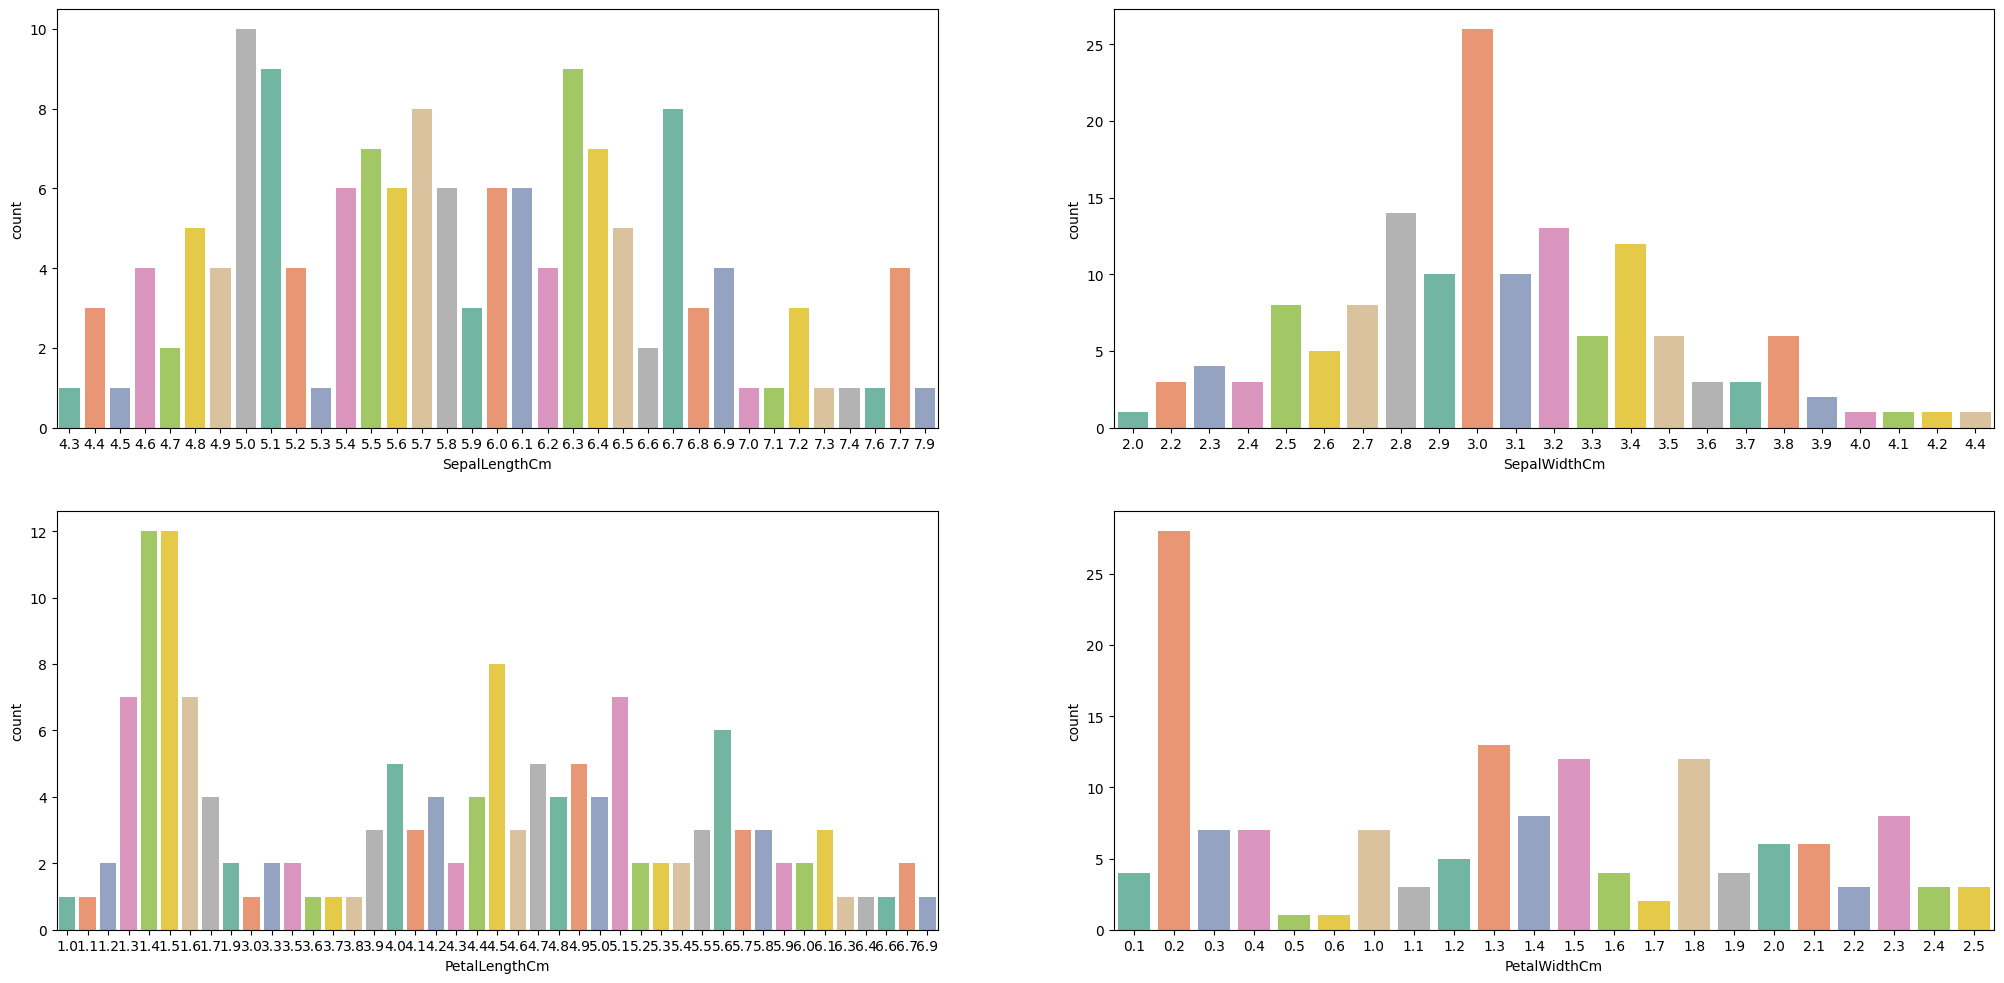

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'SepalLengthCm', palette='Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'SepalWidthCm', palette='Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'PetalLengthCm', palette='Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'PetalWidthCm', palette='Set2', data = df)



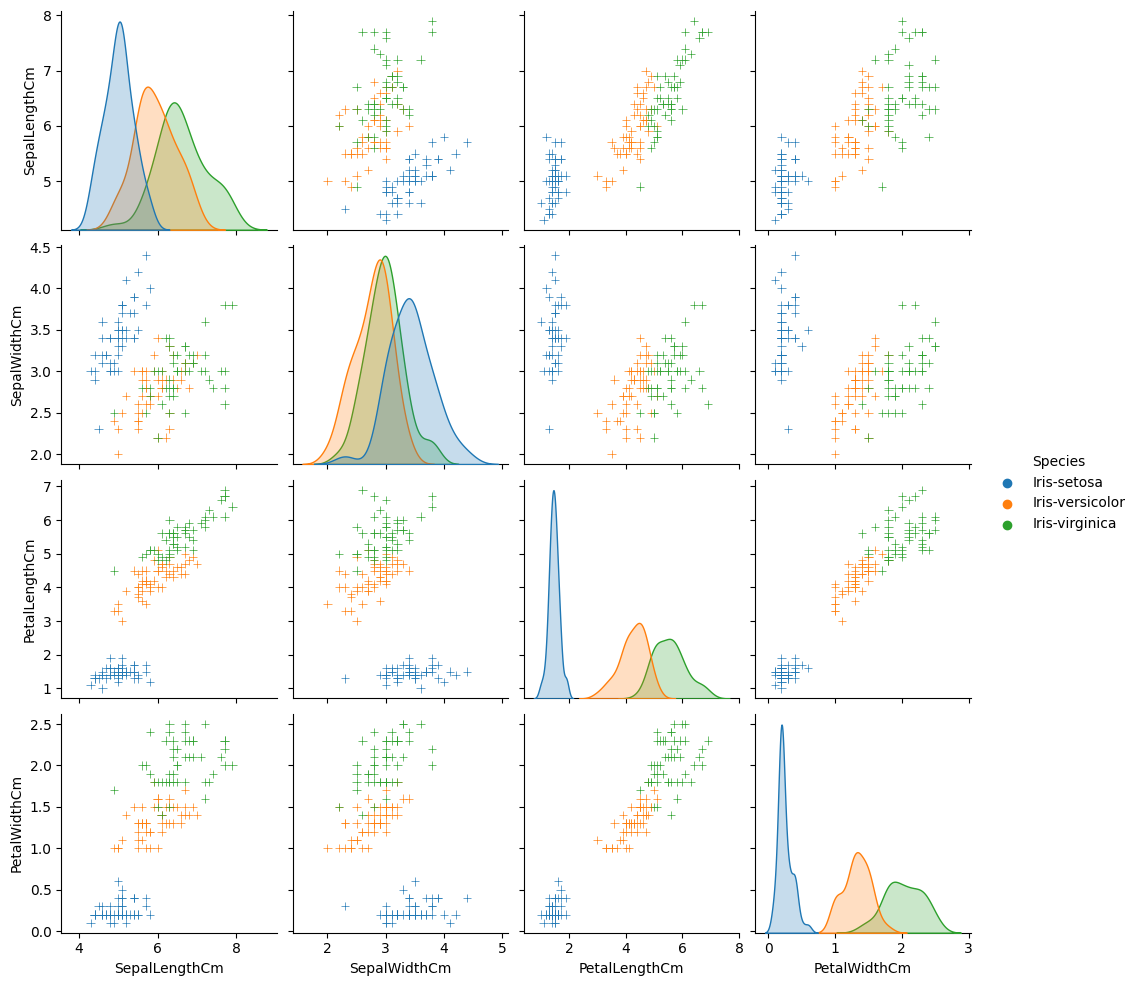

In [ ]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

In [ ]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# **Membagi data fitur dan target**

In [ ]:
X = df.drop(columns=["Species"])
y = df["Species"]


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

# **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=30)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((117, 4), (30, 4), (117,), (30,))

# **Modelling**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
accuracy_knn_test =accuracy_score(y_test, y_pred)
print("acuracy: ", accuracy_knn_test)

acuracy:  0.9666666666666667


# **Dengan Scalling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred= knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred)
print("acuracy: ", accuracy_knn_test)

acuracy:  0.9333333333333333


# **Mencoba Tunning dengan Pengulangan For**

In [ ]:
neighbor = range(1,51,2)
Train_Score = []
Test_Score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    Train_Score.append(knn.score(X_train,y_train))
    Test_Score.append(knn.score(X_test,y_test))

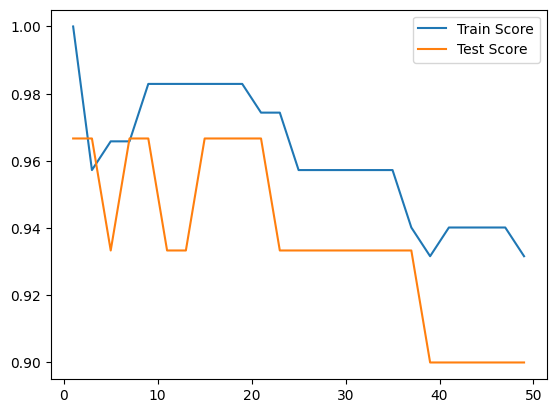

In [ ]:
plt.plot(neighbor,Train_Score,label="Train Score")
plt.plot(neighbor,Test_Score,label="Test ")
plt.legend()
plt.show()Score

In [ ]:
print(f"maksimum Test Score: {np.max(Test_Score)}")
print(f"best neighbor: {neighbor[np.argmax(Test_Score)]}")

maksimum Test Score: 0.9666666666666667
best neighbor: 1


# **Tunning dengan GridSearch**

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,51,2))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy',verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [ ]:
y_pred = grid_search.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test,y_pred)
accuracy_knn

0.9333333333333333

In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 3}


In [ ]:
grid_search.predict([[6, 3, 4, 2]])

array(['Iris-virginica'], dtype=object)